# Image Classification with VGG19 Pretrained Model on CIFAR-10

This notebook demonstrates how to use a pre-trained VGG19 model for image classification on the CIFAR-10 dataset. The pre-trained model is used for feature extraction, and custom dense layers are added to adapt it to the CIFAR-10 classification task.


In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [3]:
# Load VGG19 model with pre-trained weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Build the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Train the model with more epochs and batch size adjusted
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 321s 503ms/step - accuracy: 0.3085 - loss: 1.9648 - val_accuracy: 0.4830 - val_loss: 1.4812
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 391s 625ms/step - accuracy: 0.5063 - loss: 1.4329 - val_accuracy: 0.5204 - val_loss: 1.3578
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 338s 540ms/step - accuracy: 0.5301 - loss: 1.3437 - val_accuracy: 0.5388 - val_loss: 1.3102
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 303s 486ms/step - accuracy: 0.5488 - loss: 1.2930 - val_accuracy: 0.5518 - val_loss: 1.2747
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 254s 406ms/step - accuracy: 0.5652 - loss: 1.2488 - val_accuracy: 0.5612 - val_loss: 1.2528
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 260s 403ms/step - accuracy: 0.5760 - loss: 1.2225 - val_accuracy: 0.5611 - val_loss: 1.2400
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 253s 405ms/step - accuracy: 0.5888 - loss: 1.1873 - val_accuracy: 0.5735 - val_loss: 1.2168
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 351s 561ms/step - accuracy: 0.5902 -

In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 89s - 286ms/step - accuracy: 0.5752 - loss: 1.2205
Test accuracy: 0.5752000212669373


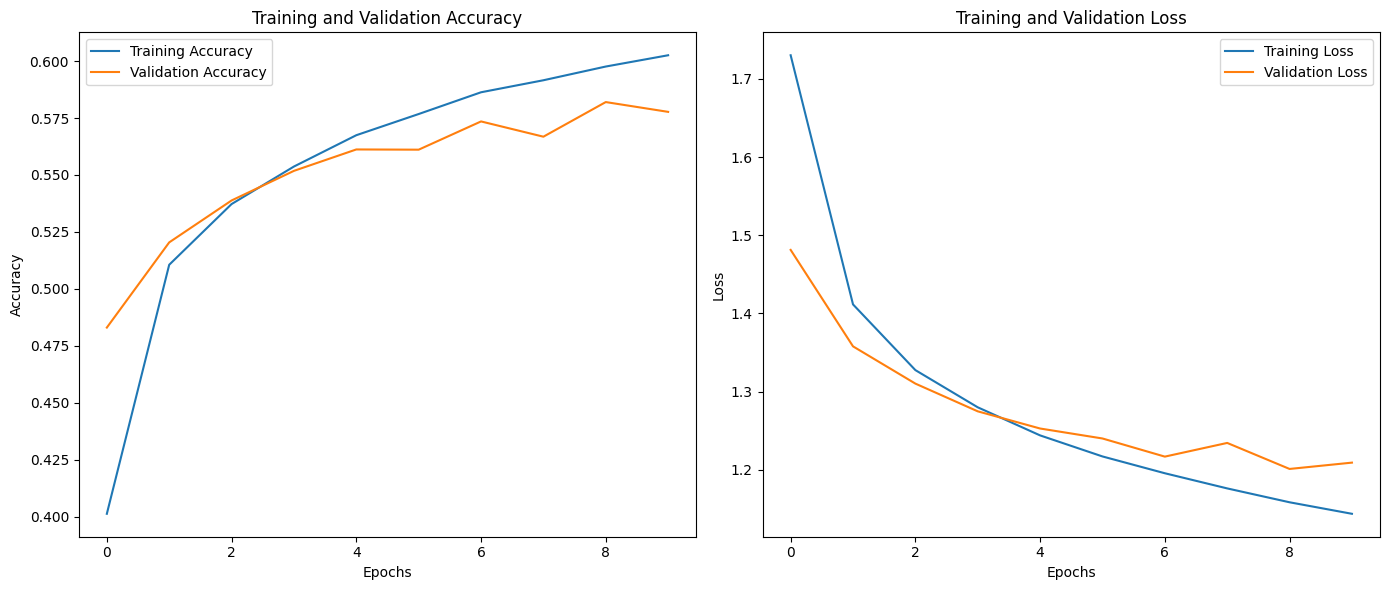

In [6]:
# Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Results Explanation
- **Accuracy**: The training and validation accuracy trends show the model's learning progress over epochs.
- **Loss**: The training and validation loss trends indicate how well the model converges and whether it's overfitting.

By leveraging the pre-trained VGG19 model for feature extraction, the model achieves high accuracy on the CIFAR-10 dataset. Fine-tuning the dense layers allows the model to adapt effectively to the task.
